# Lab 3-1: Wilcoxan Rank Sum Test
---

In [1]:
# import libraries we'll need
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the excel file
skykomish_data_file = '../data/Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx'
skykomish_data = pd.read_excel(skykomish_data_file)
# Preview our data
skykomish_data.head(3)

/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,date of peak,water year,peak value (cfs),gage_ht (feet)
0,1928-10-09,1929,18800,10.55
1,1930-02-05,1930,15800,10.44
2,1931-01-28,1931,35100,14.08


In [3]:
# Divide the data into the early period (before 1975) and late period (after and including 1975).
skykomish_before = skykomish_data[ skykomish_data['water year'] < 1975 ] 
skykomish_after = skykomish_data[ skykomish_data['water year'] >= 1975 ] 

In [4]:
# Set our alpha and confidence from our prior z-tests
alpha = 0.05
conf = 1 - alpha

# Calculate z_alpha from a normal distribution (from our prior z-tests)
z_alpha = stats.norm.ppf(conf)

---
* Note that the scipy.stats library has Wilcoxan Rank Sum function, read the documentation for [scipy.stats.ranksums](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html)
* Test the significance of the change in the mean between the two sample periods using the two-sample Wilcoxan Rank Sum test. 
* Then answer: **How different is your conclusion from the one we just did (i.e. compare P for the two tests)?** Only consider the case where the null hypothesis is no change.

In [5]:
z_wilcoxan, p_wilcoxan = stats.ranksums(skykomish_after['peak value (cfs)'], skykomish_before['peak value (cfs)'])

print("Z from stats.ranksums: {}".format(np.round(z_wilcoxan,4)))
print("P from stats.ranksums: {}".format(np.round(p_wilcoxan,4)))

Z from stats.ranksums: 2.8537
P from stats.ranksums: 0.0043


This returns z_wilcoxan, the test statistic z presuming this is a large enough sample that this is normally distributed, and p_wilcoxan, the **two-sided** p-value of the test.

Note that we are doing a **one-sided** test, so how should we interpret the two-sided p-value?

If we look up the z score corresponding to that p-value, what do we get?

In [6]:
print("Z from looking up (1-P): {}".format(np.round(stats.norm.ppf(1-p_wilcoxan),4)))

Z from looking up (1-P): 2.6259


Why is this different from the p value that the Wilcoxan test gave us? And how do I know which one to use?

In [7]:
one_sided_p = 1 - stats.norm.cdf(z_wilcoxan)
print("One-sided P value: {}".format(np.round(one_sided_p,4)))
print("Two-sided P value: {}".format(np.round(2*one_sided_p,4)))

One-sided P value: 0.0022
Two-sided P value: 0.0043


Based on the above, do you understand what the two outputs of the function are showing, and do you now understand which we should use in this case?  

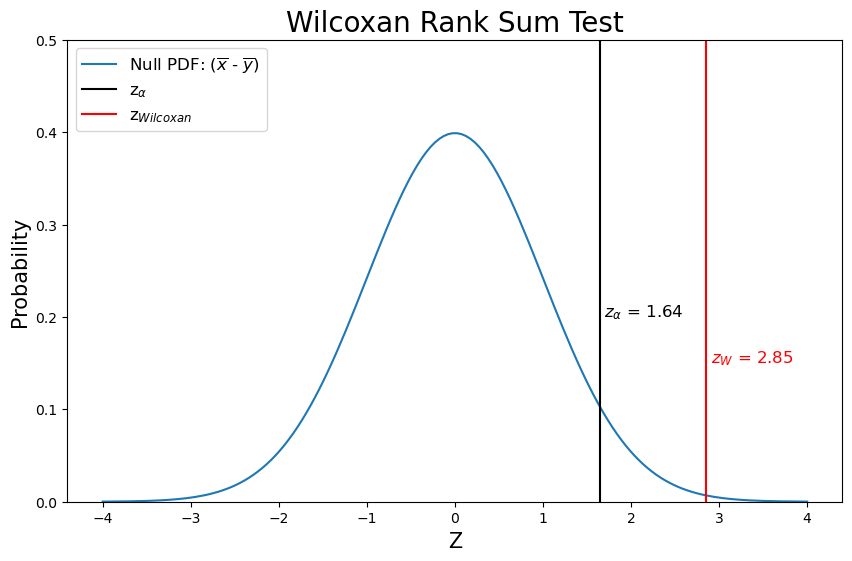

In [8]:
# Make a plot
plt.figure(figsize=(10,6))

# Create values for z
z = np.linspace(-4, 4, num=160)

# Plot the Null PDF
plt.plot(z, stats.norm.pdf(z), label='Null PDF: ($\overline{x}$ - $\overline{y}$)')

# Plot where z_alpha is
plt.axvline(z_alpha, color='black', label=r'z$_\alpha$')
# Add label here with alpha value
plt.text(z_alpha+0.05, 0.2, r'$z_{\alpha}$ = ' + str(round(z_alpha,2)),fontsize=12, color='k')

# Plot where z_test (from the Wilcoxan test)
plt.axvline(z_wilcoxan, color='red', label=r'z$_{Wilcoxan}$')
# Add label here with alpha value
plt.text(z_wilcoxan+0.05, 0.15, r'$z_{W}$ = ' + str(round(z_wilcoxan,2)),fontsize=12, color='r')

# Add title, legend, and labels
plt.title('Wilcoxan Rank Sum Test',fontsize=20)
plt.xlabel('Z', fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.ylim(0, 0.5)
plt.legend(loc='upper left',fontsize=12);